In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
import warnings
warnings.filterwarnings("ignore")

In [3]:
data = pd.read_csv(r"Wine.csv")

In [4]:
data_verify = pd.read_csv(r"Wine.csv")

In [5]:
data.head()

,Alcohol,Malic_Acid,Ash,Ash_Alcanity,Magnesium,Total_Phenols,Flavanoids,Nonflavanoid_Phenols,Proanthocyanins,Color_Intensity,Hue,OD280,Proline
0,14.23,1.71,2.43,15.6,127,2.80,3.06,0.28,2.29,5.64,1.04,3.92,1065
1,13.20,1.78,2.14,11.2,100,2.65,2.76,0.26,1.28,4.38,1.05,3.40,1050
2,13.16,2.36,2.67,18.6,101,2.80,3.24,0.30,2.81,5.68,1.03,3.17,1185
3,14.37,1.95,2.50,16.8,113,3.85,3.49,0.24,2.18,7.80,0.86,3.45,1480
4,13.24,2.59,2.87,21.0,118,2.80,2.69,0.39,1.82,4.32,1.04,2.93,735


In [6]:


data.shape



(178, 13)

In [7]:
data.describe()

,Alcohol,Malic_Acid,Ash,Ash_Alcanity,Magnesium,Total_Phenols,Flavanoids,Nonflavanoid_Phenols,Proanthocyanins,Color_Intensity,Hue,OD280,Proline
count,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000
mean,13.000618,2.336348,2.366517,19.494944,99.741573,2.295112,2.029270,0.361854,1.590899,5.058090,0.957449,2.611685,746.893258
std,0.811827,1.117146,0.274344,3.339564,14.282484,0.625851,0.998859,0.124453,0.572359,2.318286,0.228572,0.709990,314.907474
min,11.030000,0.740000,1.360000,10.600000,70.000000,0.980000,0.340000,0.130000,0.410000,1.280000,0.480000,1.270000,278.000000
25%,12.362500,1.602500,2.210000,17.200000,88.000000,1.742500,1.205000,0.270000,1.250000,3.220000,0.782500,1.937500,500.500000
50%,13.050000,1.865000,2.360000,19.500000,98.000000,2.355000,2.135000,0.340000,1.555000,4.690000,0.965000,2.780000,673.500000
75%,13.677500,3.082500,2.557500,21.500000,107.000000,2.800000,2.875000,0.437500,1.950000,6.200000,1.120000,3.170000,985.000000
max,14.830000,5.800000,3.230000,30.000000,162.000000,3.880000,5.080000,0.660000,3.580000,13.000000,1.710000,4.000000,1680.000000


In [8]:
## Checking for null values

data.isnull().sum()

Alcohol                 0
Malic_Acid              0
Ash                     0
Ash_Alcanity            0
Magnesium               0
Total_Phenols           0
Flavanoids              0
Nonflavanoid_Phenols    0
Proanthocyanins         0
Color_Intensity         0
Hue                     0
OD280                   0
Proline                 0
dtype: int64

### Handling the Outliers

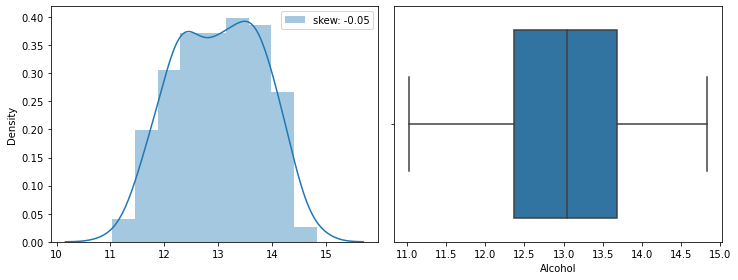

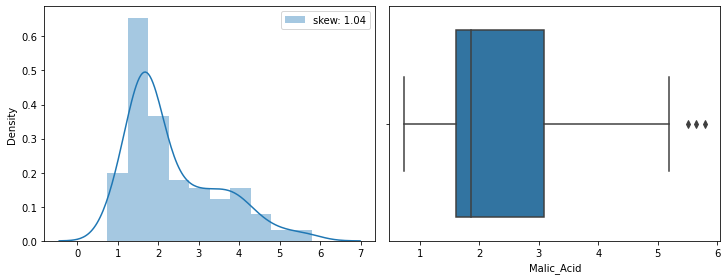

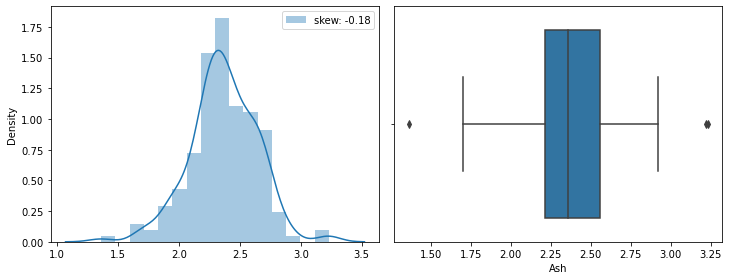

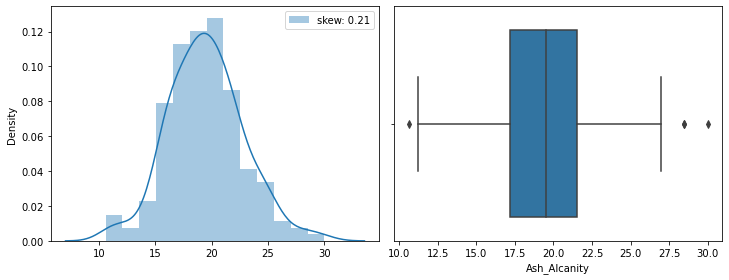

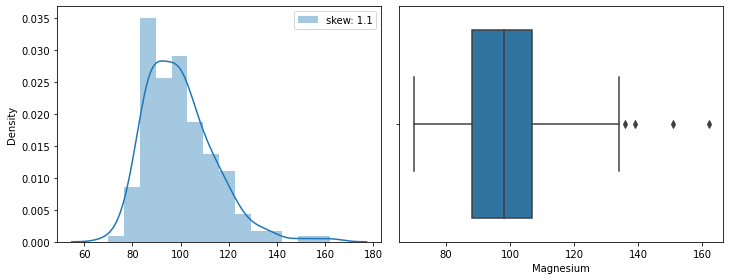

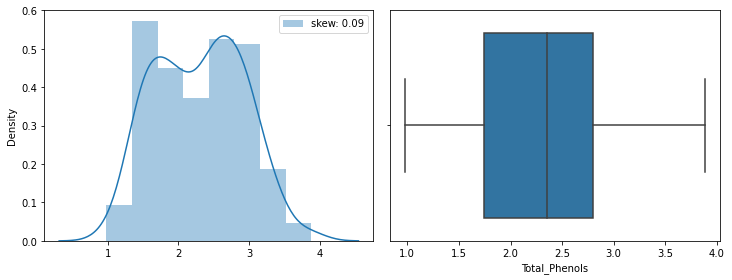

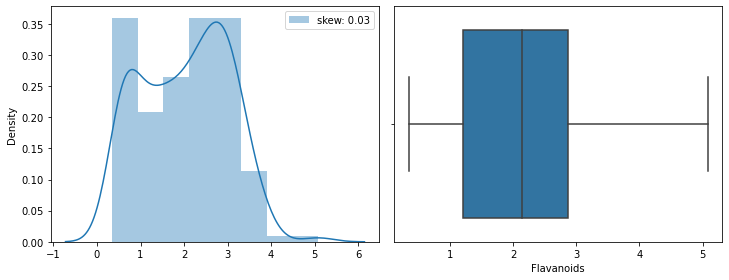

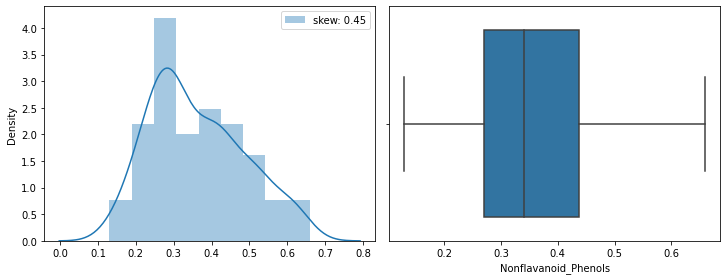

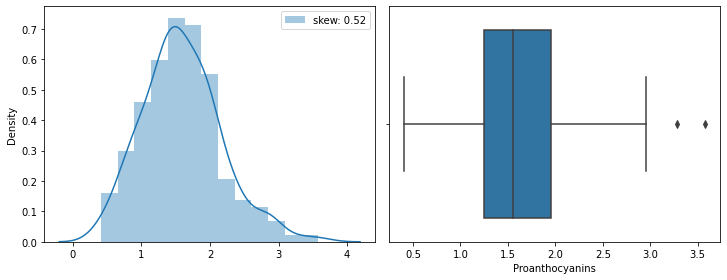

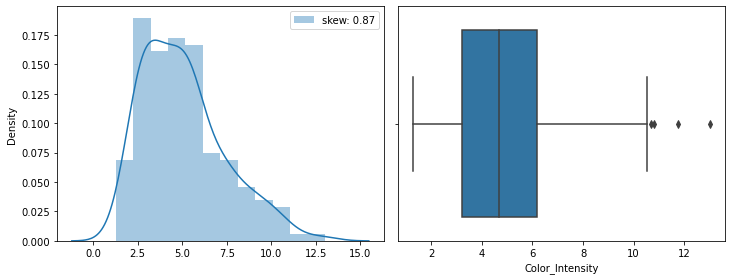

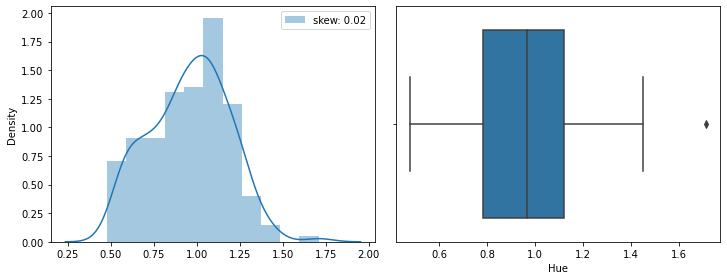

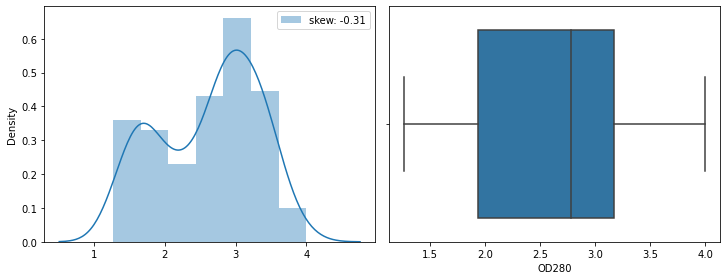

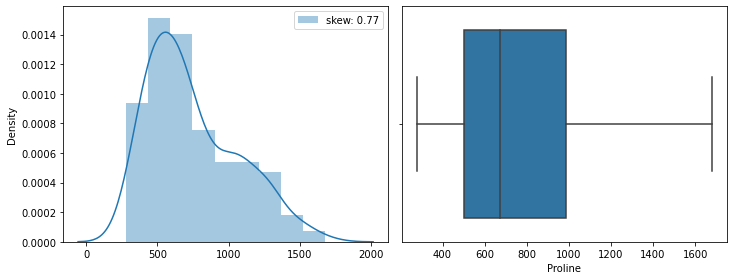

In [9]:
# Visualizing the outliers

features = data.columns.to_list()

for col in features:
    plt.figure(figsize=(15,4))
    plt.subplot(131)
    sns.distplot(x = data[col],label='skew: '+ str(np.round(data[col].skew(),2)))
    plt.legend()
    plt.subplot(132)
    sns.boxplot(data[col])
    plt.tight_layout()
    plt.show()

In [10]:
## Capping and Flooring the Outliers

def IQR_CAP(df,cols):
    
    for col in cols:
        Q1=data[col].quantile(0.25)
        Q3=data[col].quantile(0.75)
        
        IQR=Q3-Q1
        
        LL=Q1-(1.5*IQR)
        UL=Q3+(1.5*IQR)
        
        data[col]= np.where(data[col]>UL,UL,np.where(data[col]<LL,LL,data[col]))

In [11]:
IQR_CAP(data,features)

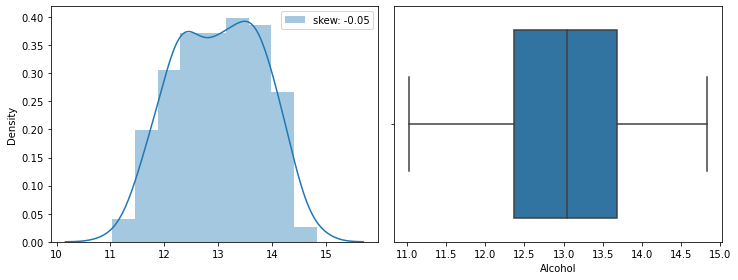

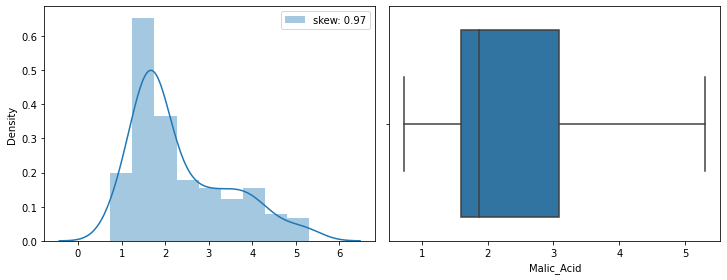

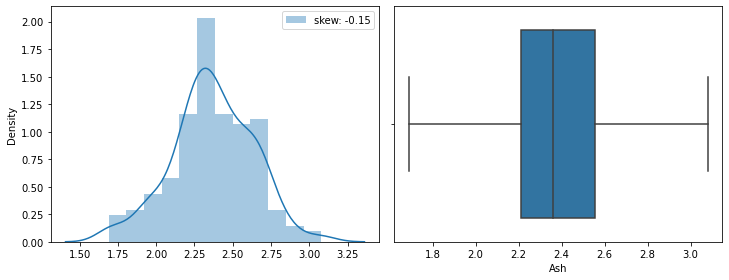

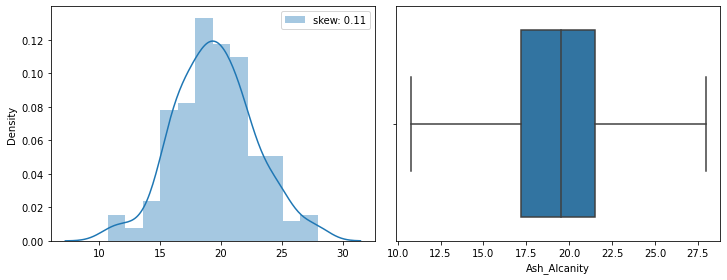

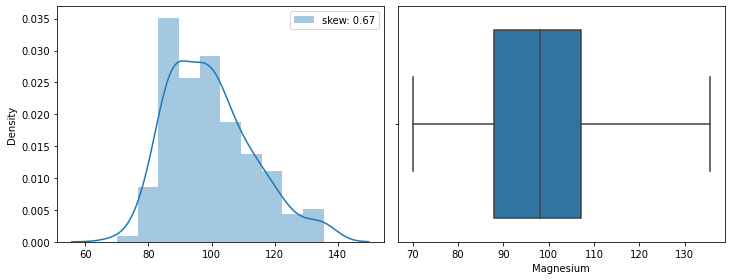

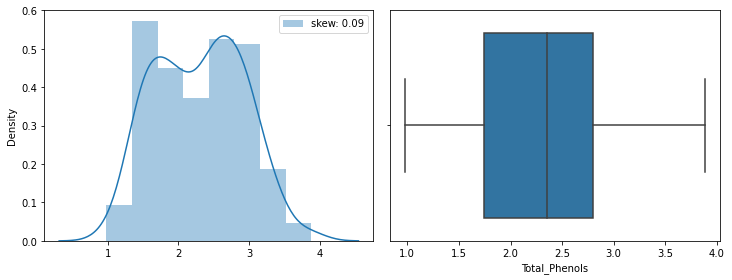

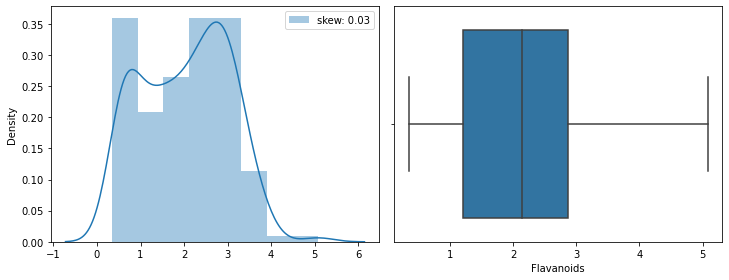

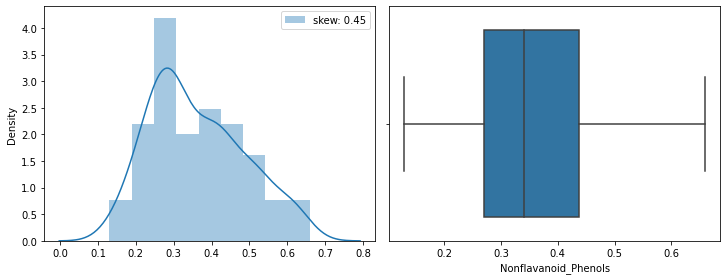

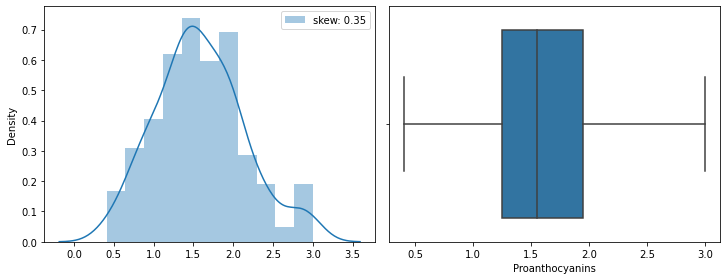

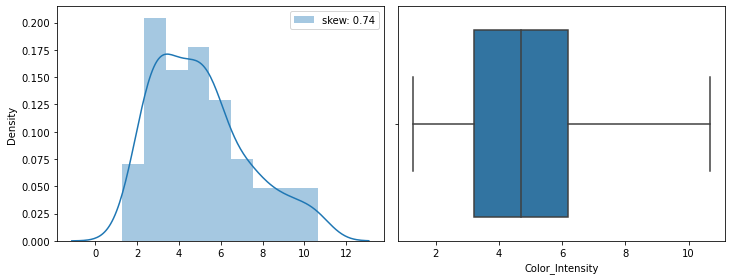

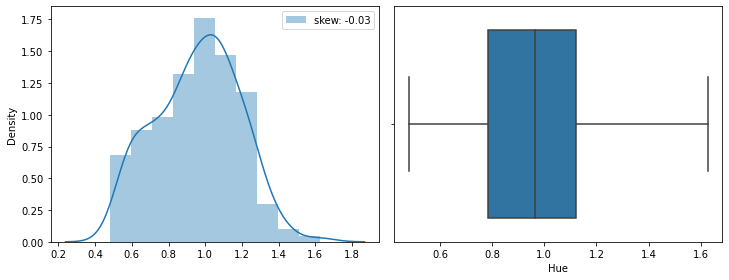

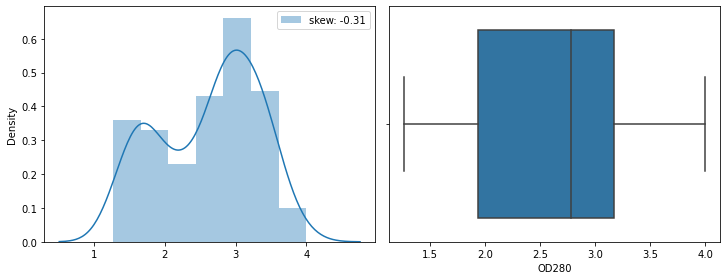

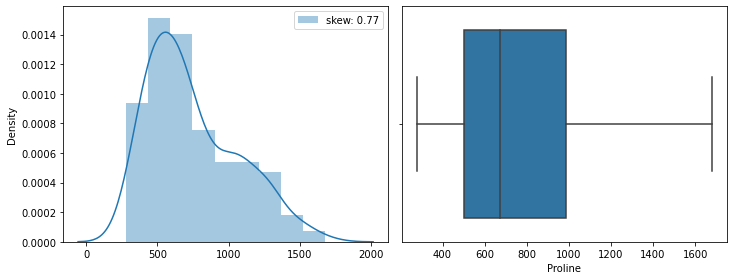

In [12]:
# Confirming the capping and flooring of outliers

for col in features:
    plt.figure(figsize=(15,4))
    plt.subplot(131)
    sns.distplot(x = data[col],label='skew: '+ str(np.round(data[col].skew(),2)))
    plt.legend()
    plt.subplot(132)
    sns.boxplot(data[col])
    plt.tight_layout()
    plt.show()



In [13]:
# Checking for duplicated values

data.duplicated().sum()

0

### K Means Clustering

In [14]:
# Lets Apply min max scaler before proceeding with clustering

from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler()
data = scaler.fit_transform(data)

In [15]:
data = pd.DataFrame(data)

In [16]:
# Finding the suitable value of k

from sklearn.cluster import KMeans

k_range = range(1,10)
sse = []

for k in k_range:
    cluster = KMeans(n_clusters=k)
    cluster.fit(data)
    sse.append(cluster.inertia_)

Text(0, 0.5, 'SSE')

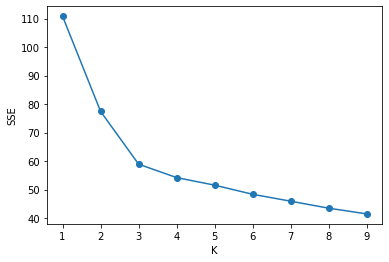

In [17]:
plt.plot(k_range,sse,"-o")
plt.xlabel("K")
plt.ylabel("SSE")

In [18]:
# k=3 looks like a good value of k

kmeans = KMeans(n_clusters=3,random_state=34)
clusters = kmeans.fit_predict(data)

In [19]:
data_verify['clusters_from_Kmeans'] = clusters

In [20]:
data_verify.head()

,Alcohol,Malic_Acid,Ash,Ash_Alcanity,Magnesium,Total_Phenols,Flavanoids,Nonflavanoid_Phenols,Proanthocyanins,Color_Intensity,Hue,OD280,Proline,clusters_from_Kmeans
0,14.23,1.71,2.43,15.6,127,2.80,3.06,0.28,2.29,5.64,1.04,3.92,1065,1
1,13.20,1.78,2.14,11.2,100,2.65,2.76,0.26,1.28,4.38,1.05,3.40,1050,1
2,13.16,2.36,2.67,18.6,101,2.80,3.24,0.30,2.81,5.68,1.03,3.17,1185,1
3,14.37,1.95,2.50,16.8,113,3.85,3.49,0.24,2.18,7.80,0.86,3.45,1480,1
4,13.24,2.59,2.87,21.0,118,2.80,2.69,0.39,1.82,4.32,1.04,2.93,735,1


### Agglomerative Hierarchical Clustering

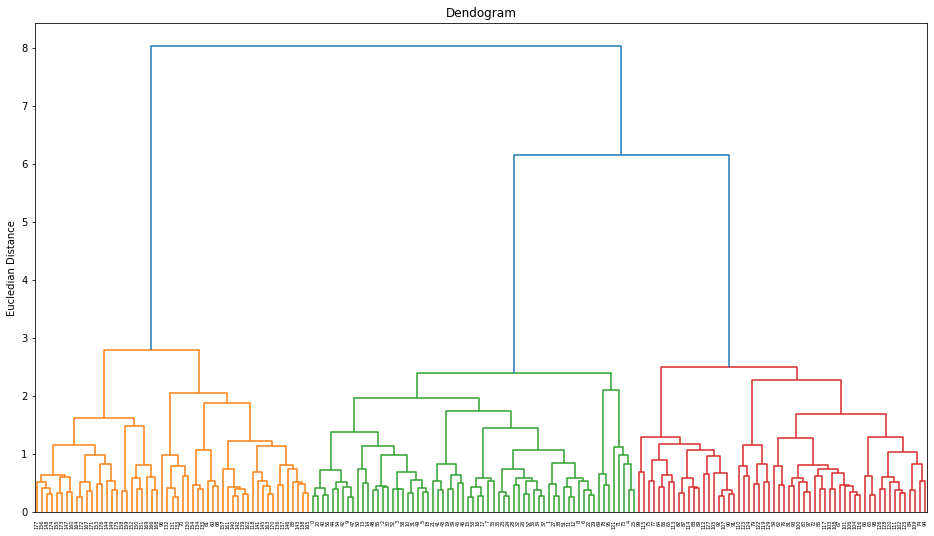

In [21]:
# Finding the optimal number of clusters using Dandrogram

import scipy.cluster.hierarchy as sch
plt.figure(figsize=(16,9))
dendo = sch.dendrogram(sch.linkage(data,method='ward'))
plt.title("Dendogram")
plt.ylabel("Eucledian Distance")
plt.show()

In [22]:
from sklearn.cluster import AgglomerativeClustering
hc = AgglomerativeClustering(n_clusters=3,affinity='euclidean',linkage='ward')
clusters = hc.fit_predict(data)

In [23]:
data_verify['clusters_from_hierarchical'] = clusters

In [24]:
data_verify.head()

,Alcohol,Malic_Acid,Ash,Ash_Alcanity,Magnesium,Total_Phenols,Flavanoids,Nonflavanoid_Phenols,Proanthocyanins,Color_Intensity,Hue,OD280,Proline,clusters_from_Kmeans,clusters_from_hierarchical
0,14.23,1.71,2.43,15.6,127,2.80,3.06,0.28,2.29,5.64,1.04,3.92,1065,1,2
1,13.20,1.78,2.14,11.2,100,2.65,2.76,0.26,1.28,4.38,1.05,3.40,1050,1,2
2,13.16,2.36,2.67,18.6,101,2.80,3.24,0.30,2.81,5.68,1.03,3.17,1185,1,2
3,14.37,1.95,2.50,16.8,113,3.85,3.49,0.24,2.18,7.80,0.86,3.45,1480,1,2
4,13.24,2.59,2.87,21.0,118,2.80,2.69,0.39,1.82,4.32,1.04,2.93,735,1,2


### Kmeans vs Hierarchical

In [25]:
data_verify.groupby('clusters_from_Kmeans').mean()

,Alcohol,Malic_Acid,Ash,Ash_Alcanity,Magnesium,Total_Phenols,Flavanoids,Nonflavanoid_Phenols,Proanthocyanins,Color_Intensity,Hue,OD280,Proline,clusters_from_hierarchical
clusters_from_Kmeans,,,,,,,,,,,,,,
0,13.134118,3.307255,2.417647,21.241176,98.666667,1.683922,0.818824,0.451961,1.145882,7.234706,0.691961,1.696667,619.058824,0.000000
1,13.676774,1.997903,2.466290,17.462903,107.967742,2.847581,3.003226,0.292097,1.922097,5.453548,1.065484,3.163387,1100.225806,2.000000
2,12.250923,1.897385,2.231231,20.063077,92.738462,2.247692,2.050000,0.357692,1.624154,2.973077,1.062708,2.803385,510.169231,0.984615


In [26]:
data_verify.groupby('clusters_from_hierarchical').mean()

,Alcohol,Malic_Acid,Ash,Ash_Alcanity,Magnesium,Total_Phenols,Flavanoids,Nonflavanoid_Phenols,Proanthocyanins,Color_Intensity,Hue,OD280,Proline,clusters_from_Kmeans
clusters_from_hierarchical,,,,,,,,,,,,,,
0,13.083818,3.171636,2.416182,21.058182,99.636364,1.693818,0.839273,0.449818,1.132545,6.926545,0.716655,1.712909,627.218182,0.145455
1,12.209310,1.963276,2.225345,20.217241,89.775862,2.277931,2.118276,0.359655,1.630862,2.959138,1.056034,2.862069,488.931034,2.000000
2,13.636308,1.962462,2.450462,17.527692,108.723077,2.819231,2.956769,0.289385,1.943077,5.350000,1.073231,3.148769,1078.338462,1.046154
